# [CIFAR-10 Image Classification](https://www.cs.toronto.edu/~kriz/cifar.html)

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

## Loading Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

##  Visualizing a Image Data

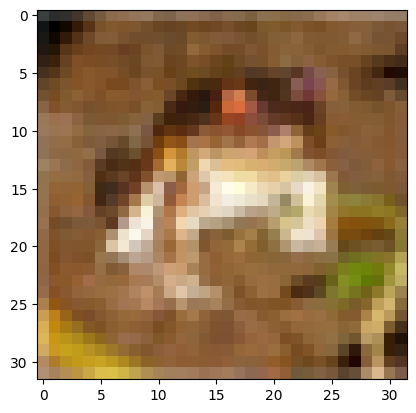

In [5]:
# FROG
plt.imshow(x_train[0])

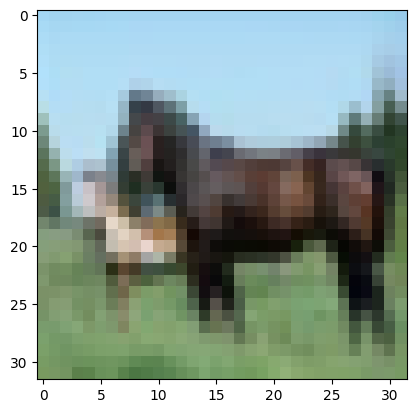

In [6]:
# HORSE
plt.imshow(x_train[12])

## PreProcessing Data

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
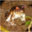

In [7]:
x_train[0]

In [8]:
x_train[0].shape

(32, 32, 3)

In [9]:
x_train.max()

255

In [10]:
x_train = x_train/255

In [11]:
x_test = x_test/255

In [12]:
x_train.shape

(50000, 32, 32, 3)

In [13]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [14]:
y_train.shape

(50000, 1)

In [15]:
y_train[0]

array([6], dtype=uint8)

In [16]:
y_cat_train = to_categorical(y_train,10)

In [17]:
y_cat_train.shape

(50000, 10)

In [18]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [19]:
y_cat_test = to_categorical(y_test,10)

## Building the Model

In [20]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 32 by 32 to 1024 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [22]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [23]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test,y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 21s 11ms/step - loss: 1.5452 - accuracy: 0.4429 - val_loss: 1.3475 - val_accuracy: 0.5284
Epoch 2/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1934 - accuracy: 0.5799 - val_loss: 1.1895 - val_accuracy: 0.5791
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0362 - accuracy: 0.6380 - val_loss: 1.0552 - val_accuracy: 0.6330
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9228 - accuracy: 0.6795 - val_loss: 1.0798 - val_accuracy: 0.6335
Epoch 5/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8364 - accuracy: 0.7131 - val_loss: 0.9958 - val_accuracy: 0.6710
Epoch 6/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7654 - accuracy: 0.7371 - val_loss: 1.0586 - val_accuracy: 0.6635
Epoch 7/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7084 - accuracy: 0.7564 - val_loss: 1.0141 - val_accurac

In [24]:
losses = pd.DataFrame(model.history.history)

In [25]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.545165,0.44288,1.347528,0.5284
1,1.193429,0.57994,1.189499,0.5791
2,1.036159,0.63804,1.055239,0.6330
3,0.922820,0.67952,1.079842,0.6335
4,0.836385,0.71310,0.995760,0.6710


<Axes: >

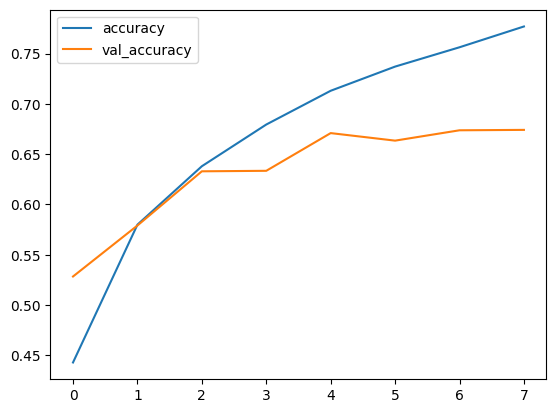

In [26]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

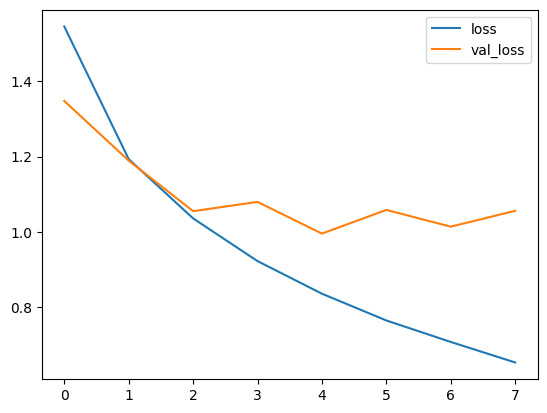

In [27]:
losses[['loss','val_loss']].plot()

In [28]:
model.metrics_names

['loss', 'accuracy']

In [29]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.0562103986740112, 0.6741999983787537]


In [30]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)

313/313 [==============================] - 1s 2ms/step


In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      1000
           1       0.82      0.77      0.80      1000
           2       0.55      0.61      0.58      1000
           3       0.56      0.39      0.46      1000
           4       0.56      0.69      0.62      1000
           5       0.66      0.49      0.56      1000
           6       0.68      0.82      0.74      1000
           7       0.79      0.67      0.72      1000
           8       0.67      0.84      0.75      1000
           9       0.78      0.74      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [32]:
confusion_matrix(y_test,predictions)

array([[720,  19,  60,  12,  23,   9,  14,  10, 111,  22],
       [ 28, 772,   7,   6,   5,   2,  14,   3,  76,  87],
       [ 62,   7, 615,  29, 101,  46,  76,  20,  32,  12],
       [ 30,  11,  99, 387, 121, 112, 130,  35,  50,  25],
       [ 35,   5,  96,  37, 685,  19,  62,  40,  16,   5],
       [ 18,   8,  93, 151,  93, 493,  63,  41,  24,  16],
       [  9,   4,  59,  20,  52,  12, 822,   6,  11,   5],
       [ 30,   2,  53,  25, 122,  50,  18, 666,  13,  21],
       [ 67,  27,  21,   6,  10,   4,   5,   4, 838,  18],
       [ 41,  82,  13,  13,   6,   4,  11,  14,  72, 744]])

<Axes: >

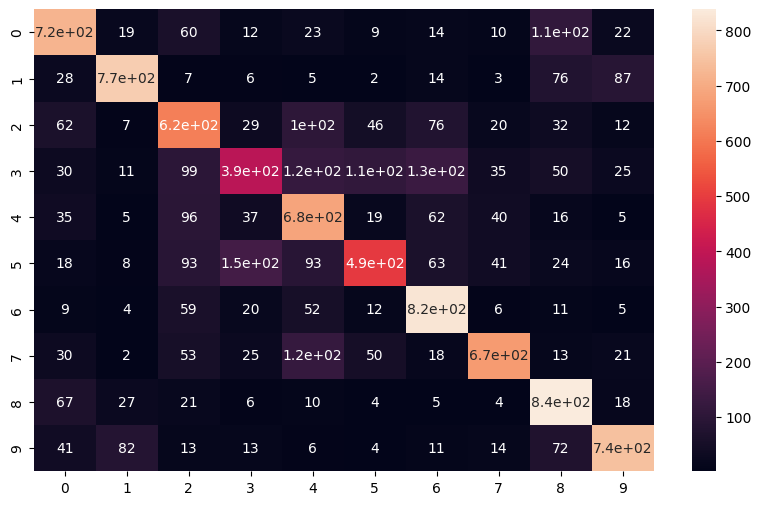

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

## Predicting a given image

In [34]:
my_image = x_test[16]

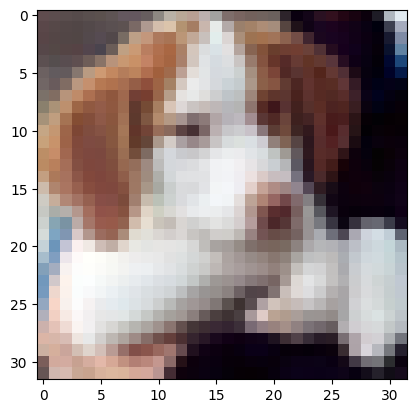

In [35]:
plt.imshow(my_image)

In [36]:
# SHAPE --> (num_images,width,height,color_channels)
my_prediction = model.predict(my_image.reshape(1,32,32,3))
my_prediction = np.argmax(my_prediction, axis=-1)
print(my_prediction)

1/1 [==============================] - 0s 106ms/step
[5]
